<a href="https://colab.research.google.com/github/hbbalamsyah/Currency-Nominal-Detection-Using-CNN/blob/main/preprocessing_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Semua gambar hasil preprocessing langsung disimpan ke google drive

**Adjust Brightness**

tidak perlu di running lagi, karena setelah running, sudah di seleksi hanya 2 foto terbagus

In [ ]:
 import cv2
 import os

 def adjust_brightness(image, value):
     return cv2.convertScaleAbs(image, alpha=value, beta=0)

 # Direktori tempat menyimpan gambar-gambar uji
 dataset_uji_dir = '/content/drive/MyDrive/uang uji all'

 # Atur nilai konstanta untuk peningkatan kecerahan
 brightness_value = 1.25 # Untuk mengatur tingkat kecerahan

 # Loop melalui semua gambar dalam direktori uji
 for gambar_filename in os.listdir(dataset_uji_dir):
     gambar_path = os.path.join(dataset_uji_dir, gambar_filename)

     # Baca gambar asli
     image = cv2.imread(gambar_path)

     # Ubah kecerahan gambar
     brightened_image = adjust_brightness(image, brightness_value)

     # Simpan gambar yang telah diubah
     output_path = os.path.join('/content/drive/MyDrive/uang uji baru/Terang_125', gambar_filename)
     cv2.imwrite(output_path, brightened_image)

 # Tampilkan plot
 #import matplotlib.pyplot as plt

 # Cek salah satu gambar yang telah diubah
 #sample_image_path = os.path.join('/content/drive/MyDrive/dataset uang baru/1. adjust brightness', os.listdir(dataset_uji_dir)[0])
 #sample_image = cv2.imread(sample_image_path)
 #plt.figure(figsize=(10, 5))
 #plt.subplot(1, 2, 1)
 #plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
 #plt.title('Gambar Asli')

 #plt.subplot(1, 2, 2)
 #plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB))
 #plt.title('Gambar dengan Kecerahan Tinggi')

 # Tampilkan plot
 #plt.show()


**Augmentasi Flip**

In [ ]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# Direktori tempat Anda menyimpan gambar-gambar uji
input_dir = '/content/drive/MyDrive/dataset uang baru/1. adjust brightness'

# Membuat direktori untuk menyimpan hasil flip
output_dir = '/content/drive/MyDrive/dataset uang baru/2. flip'
os.makedirs(output_dir, exist_ok=True)

# Daftar semua file gambar dalam direktori input
image_files = [f for f in os.listdir(input_dir) if f.endswith('.JPG')]

# Loop melalui semua gambar dalam direktori input
for image_file in image_files:
    image_path = os.path.join(input_dir, image_file)

    # Load gambar asli
    img = Image.open(image_path)

    # Transformasi flip vertical pada gambar asli
    vertical_flip_original = transforms.RandomVerticalFlip(p=1)  # Flip vertikal dengan probabilitas 1 pada gambar asli
    flipped_vertical_original_img = vertical_flip_original(img)

    # Transformasi flip horizontal pada gambar asli
    horizontal_flip = transforms.RandomHorizontalFlip(p=1)  # Flip horizontal dengan probabilitas 1
    flipped_horizontal_img = horizontal_flip(img)

    # Transformasi flip horizontal pada hasil flip vertical gambar asli
    horizontal_flip_vertical_original = transforms.RandomHorizontalFlip(p=1)  # Flip horizontal dengan probabilitas 1 pada hasil flip vertical gambar asli
    flipped_horizontal_vertical_original_img = horizontal_flip_vertical_original(flipped_vertical_original_img)

    # Simpan hasil flip horizontal dan vertical untuk setiap gambar
    img.save(os.path.join(output_dir, f'{os.path.splitext(image_file)[0]}_original.jpg'))



**Augmentasi CROP**

Pada tahap ini data diambil dari data yg sudah di adjust brightness

In [ ]:
import cv2
import os

# Direktori input dan output
input_dir = '/content/drive/MyDrive/dataset uang baru/2. flip'
output_dir = '/content/drive/MyDrive/dataset uang baru/3. Crop 3 bagian'

# List semua file gambar di direktori input
gambar_filenames = os.listdir(input_dir)

# Iterasi melalui setiap file gambar
for gambar_filename in gambar_filenames:
    # Baca gambar
    image = cv2.imread(os.path.join(input_dir, gambar_filename))

    # Dapatkan dimensi gambar
    height, width, _ = image.shape

    # Hitung ukuran bagian
    bagian_height = height
    bagian_width = width // 3

    # Potong gambar menjadi 3 bagian
    bagian_1 = image[0:bagian_height, 0:bagian_width]
    bagian_2 = image[0:bagian_height, bagian_width:2 * bagian_width]
    bagian_3 = image[0:bagian_height, 2 * bagian_width:3 * bagian_width]

    # Simpan setiap bagian
    base_filename = os.path.splitext(gambar_filename)[0]  # Nama file tanpa ekstensi
    cv2.imwrite(os.path.join(output_dir, f'{base_filename}_bagian_1.jpg'), bagian_1)
    cv2.imwrite(os.path.join(output_dir, f'{base_filename}_bagian_2.jpg'), bagian_2)
    cv2.imwrite(os.path.join(output_dir, f'{base_filename}_bagian_3.jpg'), bagian_3)


**Augmentasi Rotation**

In [ ]:
import torchvision.transforms as transforms
from PIL import Image
import os

# Direktori tempat Anda menyimpan gambar yang akan dirotasi
input_dir = '/content/drive/MyDrive/dataset uang baru/3. Crop 3 bagian'

# Direktori tempat Anda akan menyimpan gambar hasil rotasi
output_dir = '/content/drive/MyDrive/dataset uang baru/4. rotasi'

# Buat direktori output jika belum ada
os.makedirs(output_dir, exist_ok=True)

# Daftar semua nama file gambar dalam direktori input
image_filenames = os.listdir(input_dir)

# Daftar sudut rotasi yang diinginkan (dalam derajat)
rotation_angles = [45, 135, 225, 315]

# Transformasi rotasi
rotation_transforms = [transforms.RandomRotation(degrees=angle) for angle in rotation_angles]

# Loop melalui semua gambar dalam direktori input
for image_filename in image_filenames:
    # Baca gambar
    image_path = os.path.join(input_dir, image_filename)
    img = Image.open(image_path)

    # Terapkan 4 rotasi berbeda
    for i, rotation_angle in enumerate(rotation_angles):
        rotated_img = rotation_transforms[i](img)

        # Simpan gambar hasil rotasi dengan menambahkan sudut ke nama file
        output_path = os.path.join(output_dir, f'{os.path.splitext(image_filename)[0]}_{rotation_angle}.jpg')
        rotated_img.save(output_path)

# Tampilkan contoh hasil rotasi dari satu gambar
sample_image_path = os.path.join(output_dir, os.listdir(output_dir)[0])
sample_rotated_images = [Image.open(os.path.join(output_dir, f'{os.path.splitext(image_filename)[0]}_{angle}.jpg')) for angle in rotation_angles]




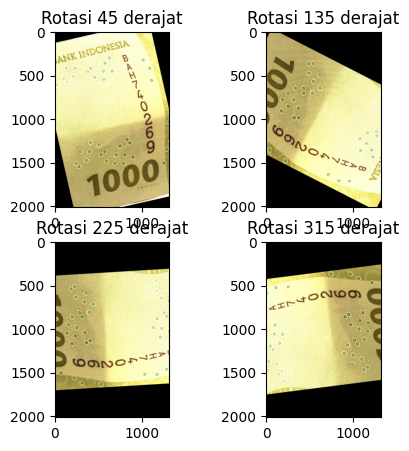

In [ ]:
# Tampilkan gambar asli dan hasil rotasi
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(sample_rotated_images[i])
    ax.set_title(f'Rotasi {rotation_angles[i]} derajat')

plt.show()

**Resize**

In [ ]:
import cv2
import os

# Direktori input dan output
input_dir = '/content/drive/MyDrive/dataset uang baru/4. rotasi'
output_dir = '/content/drive/MyDrive/dataset uang baru/5. resize'

# List semua file gambar di direktori input
gambar_filenames = os.listdir(input_dir)

# Iterasi melalui setiap file gambar
for gambar_filename in gambar_filenames:
    # Baca gambar
    image = cv2.imread(os.path.join(input_dir, gambar_filename))

    # Resize gambar menjadi skala 256x256
    resized_image = cv2.resize(image, (256, 256))

    # Simpan gambar yang telah diresize
    base_filename = os.path.splitext(gambar_filename)[0]  # Nama file tanpa ekstensi
    cv2.imwrite(os.path.join(output_dir, f'{base_filename}.jpg'), resized_image)
